# Reto 2: Análisis cinemático en ciclismo

- Paola Andrea Campiño 202020785
-Isabella Contreras 202011871

## 1. Explicación del problema:


### 1.1 Explicación general del problema:

Se quiere crear un modelo de regresión lineal que prediga el comportamiento de la rodilla izquierda basado en los datos recuperados de la rodilla derecha en la serie de tiempo.



### 1.2 Definición de los componentes de un problema de optimización primera parte:

- **Función objetivo**: Se puede escribir como se ve en la formula 1 (1). Que en pocas palabras es el proceso de minimos cuadrados con regularización, lo que implica es que se busca la norma minima entre el y calculado y el y real.

- Hay que tener en cuenta que en este caso x está dado por las unidades s (segundos), $R$ sería los datos de la rodilla derecha, $I$ sería los datos en la rodilla izquierda.

- $C$ es un hiperparametro que toca verificar a punta de prueba y error, con $n$ pasa lo mismo, pues este parametro nos define los betas a definir.

\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| I(x)-\left ( β_{0}R(x) +...+ \beta_nR(x-n) \right)\right| \right|_2^2 .+\left | \left| C\right| \right|_2^2 (1)
 \end{align*}


 - Hay que tener en cuenta que esta función objetivo nos funciona para todo dato que este $n-1<x<m$

- **Variables de desición**: En este caso las variables de desición son todos los $β_n$. Lo que quiere decir que para esta primera parte hay un total de $n+1$ betas.


- **Restricciones**: En cuanto a restricciones se puede decir que no hay.

## 2. Regresión por minimos cuadrados:

### 2.1 Importar librerias y cargar datos:




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_t = pd.read_csv("train.csv", sep=";")
print(data_t.head())
print(len(data_t))

       der      izq
0  146,567  74,4195
1  146,528  74,4264
2  146,484  74,4339
3  146,438  74,4419
4  146,389  74,4503
5040


### 2.1 Analisis de datos:

El código que continuación permite graficar:
-  rodilla izquierda vs tiempo.
-  rodilla derecha vs tiempo.

Esto nos permite visualizar si hay una necesidad hacer limpieza de datos.

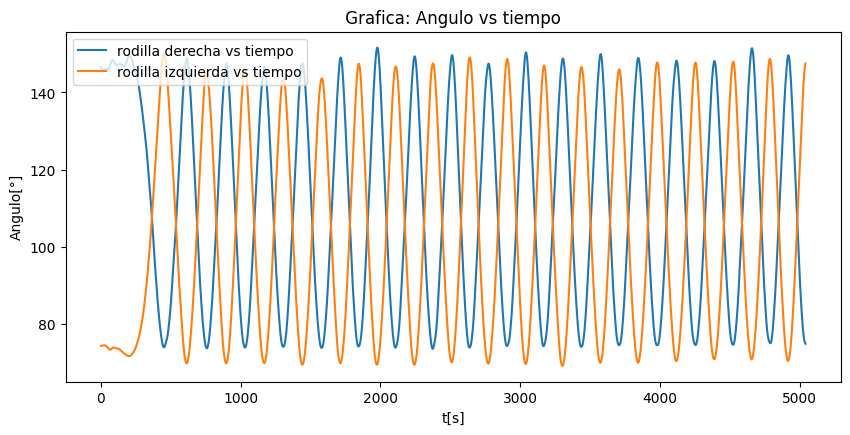

In [ ]:

def convertir_a_float(string_num):
    return float(string_num.replace(',', '.'))
rod_der = data_t['der'].apply(convertir_a_float)
rod_izq = data_t["izq"].apply(convertir_a_float)

figure_1 = plt.figure(figsize=(10, 10))

ax_2 = figure_1.add_subplot(2,1,1)
t=np.linspace(0, len(rod_der), len(rod_der))
ax_2.plot(t,rod_der, label="rodilla derecha vs tiempo")
ax_2.set_title(" Grafica: Angulo vs tiempo ")
ax_2.set_ylabel('Angulo[°]')
ax_2.set_xlabel('t[s]')


ax_2.plot(t,rod_izq, label="rodilla izquierda vs tiempo")


ax_2.legend(loc = 'upper left')

### 2.2 Limpieza de datos:

#### 2.2.1 Limpieza de datos: Explicación código
En base a la grafica anterior se ha llegado a notar que se una necesidad de quitar aquellos primeros datos que no son consistentes con las graficas en general.

En el código que se ve a continuación,  permite cortar los datos con los que se trabajo. El criterio para decidir desde que punto se ha cortado se ha hecho en base a que no se vean esos primeros datos iniciales.

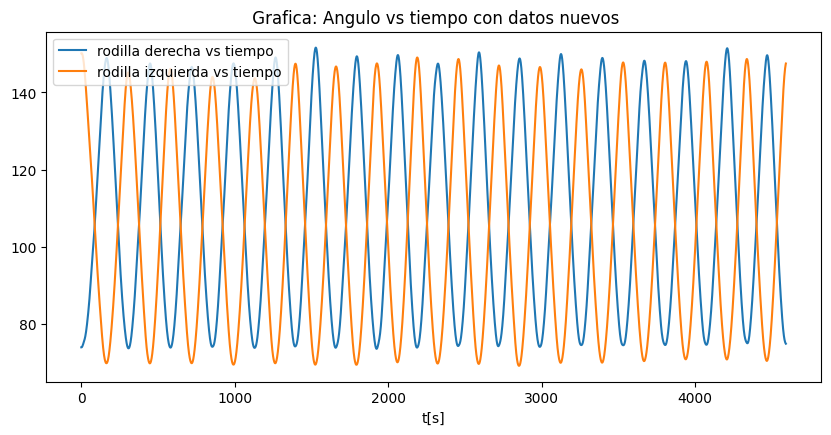

In [ ]:

clean_rod_der  = rod_der[450:]
clean_rod_izq = rod_izq[450:]


figure_2 = plt.figure(figsize=(10, 10))

ax_2 = figure_2.add_subplot(2,1,1)
t=np.linspace(0, len(clean_rod_izq), len(clean_rod_izq))
ax_2.plot(t,clean_rod_der, label="rodilla derecha vs tiempo")
ax_2.set_title(" Grafica: Angulo vs tiempo con datos nuevos")
ax_2.set_xlabel('t[s]')


ax_2.plot(t,clean_rod_izq, label="rodilla izquierda vs tiempo")


ax_2.legend(loc = 'upper left')


#### 2.2.1 Explicación limpieza de datos

se ha optado trabajar desde 450-5040 datos. Si bien quitar datos podría dar una desventaja al momento de entrenar los datos, también puede ser beneficioso en cuanto a que se está quitando datos que no hacen parte del entrenamiento.

### 2.3 Planteamiento de la Matriz h.


Para este laboratorio se asume que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación como se ha mencionado antes:
\begin{align*}
  y^* = g(x; \beta)=β_{0}x +...+ \beta_n R(x-n) (2),\\
 \end{align*}


 En el código a continuación, se puede ver el proceso de plantear la matriz h, calcular los betas, por medio de la siguiente formula teniendo en cuenta que se ha realizado una regularización:

  \begin{align*}
  \beta^* =  (H^TH+I  c)^{-1}H^Ty .
 \end{align*}

Cabe resaltar que el C, nos habla de una penalización para evitar el sobre ajuste. Lo cual nos permitirá evitar que los betas nos lleve a un modelo sobreajustado.


In [ ]:


def print_coeficientes(coef):
    for i in range(0,len(coef)):
      print("\u03B2_"+str(i)+":"+str(coef[i]))
def matriz_h(arr=clean_rod_der,n=1,desp=450):
    s=(len(arr)-n-1,n+1)
    matriz_result=np.ones(s)
    for i in range(0,len(arr)):
        for j in range(0,n+1):
          if (n+1<=i):


              matriz_result[i-n-1][j]=arr[i+desp-j]

    return matriz_result

def beta_c(h, c,y=clean_rod_izq):
    s=(len(h[0]),len(h[0]))
    indentidad=np.ones(s)
    ht_h=np.dot(h.transpose(),h)
    ci= c*indentidad

    ht_h_ci = ht_h+ci
    ht_transpose = np.linalg.inv(ht_h_ci)
    htransp_ht = np.dot(ht_transpose,h.transpose())
    new_y = y[len(h[0])+450:]
    print(len(htransp_ht))
    print(len(new_y))
    beta_c = np.dot(htransp_ht,new_y)
    return beta_c

def rod_izq_values(n,c):
  h=matriz_h(clean_rod_der,n,450)
  coeficientes=beta_c(h,c, rod_izq)

  return np.dot(h,coeficientes)

def calc_error(arr, arr_real):

  return np.linalg.norm(np.array(arr_real) - np.array(arr))
def calcular_rmse(valores_reales, valores_predichos):
    valores_reales = np.array(valores_reales)
    valores_predichos = np.array(valores_predichos)

    diferencias_cuadradas = (valores_reales - valores_predichos) ** 2

    rmse = np.sqrt(np.mean(diferencias_cuadradas))
    return rmse


### 2.4 Aproximación inicial:

- Se ha considerado que el valor n podría ser un valor 80 y c se ha dejado en 0.
Si bien la aproximación no es muy buena, se pude ver que se asimila a la gráfica, y por lo tanto de puede ver indicios que n podría ser un valor muy alto,  con c no se llegó a notar tanto el cambió entonces se ha dejado en 0.

81
4509


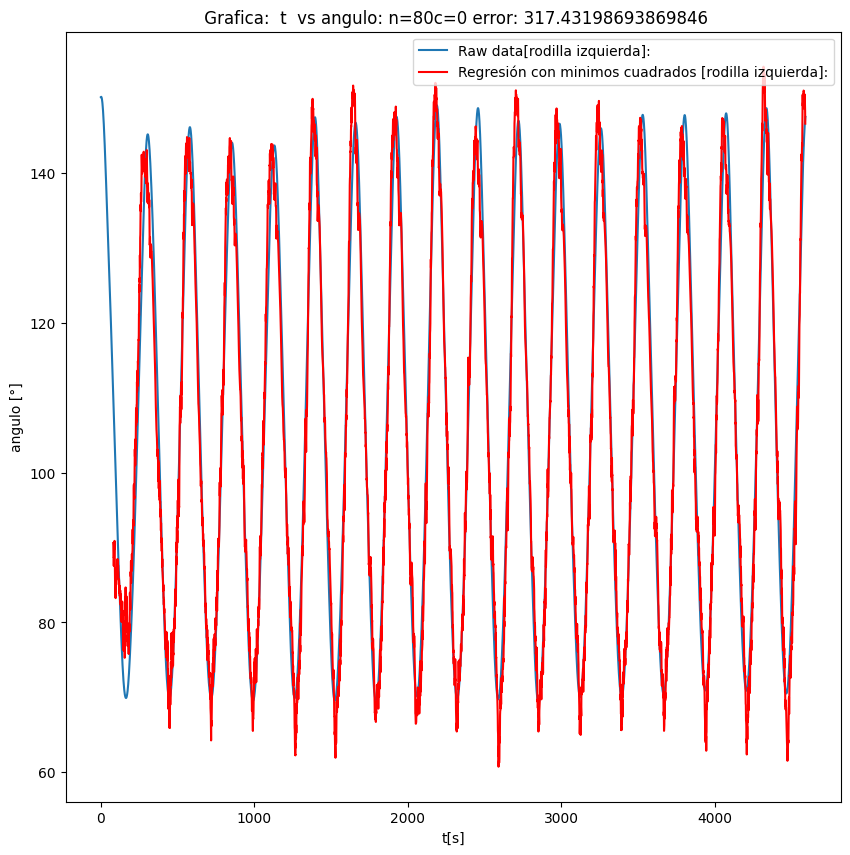

In [ ]:
h=matriz_h(clean_rod_der,80,450)
coeficientes=beta_c(h,0, rod_izq)
y = np.dot(h,coeficientes)
figure_3= plt.figure(figsize=(10, 10))
new_y = rod_izq[len(h[0])+450:]
eror_tot=calc_error(y,new_y)

ax_1 = figure_3.add_subplot(1,1,1)
t_or=np.linspace(0, len(clean_rod_izq), len(clean_rod_izq))

ax_1.plot(t_or,clean_rod_izq, label='Raw data[rodilla izquierda]:')
ax_1.set_title(" Grafica:  t  vs angulo: n="+str(80)+"c="+str(0)+" error: "+str(eror_tot))
ax_1.set_ylabel('angulo [°]')
ax_1.set_xlabel('t[s]')


elementos_vacios = np.full(80, np.nan)
y = np.concatenate((elementos_vacios, y))
t=np.linspace(0, len(y), len(y))

ax_1.plot(t,y, label='Regresión con minimos cuadrados [rodilla izquierda]:', color="r")
ax_1.legend(loc = 'upper right')

plt.show()

### 2.4 Resultados de minimos cuadrados

A continuación, se a comenzar a validar el error con los datos de **entrenamiento** y con los datos de **validación**. Para hacer esto se ha hecho el calculo de betas, se obtiene los *y y se compara con los datos reales con la norma L2.

**- Entre más cercano el valor sea de 0, más exacto es el módelo.**



#### 2.4.1 Con datos de entrenamiento

- calc_betas: Es una función que nos permite sacar los betas para un rango de $n$ y un rango de $c$.
- se realizó


- Para establecer el mejo valor de n se realizaron varias pruebas simultaneas en diferentes notebooks, entre las observaciones se llegó a notar que:
  - El mejor hiperparametro n es 137, c = 7 y el error total es de = 168. En los datos de entrenamiento

  - El mejor hiperparametro n es 146, c = -10 y el error total es de = 149.82663099976926. En los datos de validación.

  **Hay que tener en cuenta que que realmente no hubo tanta variación con las pruebas de validación. sin embargo, se llegó a notar que se tiene un mayor efecto en los datos de entrenamiento.
  Por lo que se ha optado por tomar los hipeparametros de los datos de entrenamiento**


- Si bien la validación del error se está haciendo con los mismos datos de entrenamiento, esta información es valiosa ya que nos puede dar una idea del modelo.

In [ ]:

def calc_betas (inic=20, fin=60,cin=-10, cfin=10):
    minimo =99999999999
    n =80
    c=-10
    min_rmse= 0

    minimo_rmse =99999999999
    n_rmse =80
    c_rmse=-10
    min_rmse_error= 0


    for i in range(inic,fin):
      for j in range(cin, cfin):
        rod_izquierda=rod_izq_values(i,j)
        new_y = rod_izq[i+450+1:]
        eror_calc=calc_error(rod_izquierda,new_y)
        error_rmse = calcular_rmse(rod_izquierda,new_y)
        if (eror_calc<minimo):
          minimo= eror_calc
          n = i
          c = j
          min_rmse= error_rmse

        if(error_rmse<minimo_rmse):
          minimo_rmse= error_rmse
          n_rmse = i
          c_rmse = j
          min_rmse_error= eror_calc
        print("n = "+str(i)+"c = "+str(j)+" Norma L2:" +str(eror_calc)+" rmse: "+str(error_rmse))

    return [[minimo,n, c, min_rmse], [minimo_rmse, n_rmse, c_rmse,min_rmse_error]]




In [ ]:
minimo_calc = calc_betas(inic = 80,fin =200)

print("El minimo de todos es: ")
print(minimo_calc)

#El minimo de todos es:
#Error, n, c
#[[168.57265779462853, 136, 7, 2.526159607297536], [2.526159607297536, 136, 7, 168.57265779462853]

In [ ]:
minimo_calc_3 = calc_betas(inic = 128,fin = 129,cin=-2, cfin=0)


#El minimo de todos es:
#n = 128c = -1 Norma L2:171.65615316811284 rmse: 2.570060010118371

129
4461
n = 128c = -2 Norma L2:232.0061652195982 rmse: 3.4736288581967893
129
4461
n = 128c = -1 Norma L2:202.6134719424848 rmse: 3.033557330395497


In [ ]:
minimo_calc_4 = calc_betas(inic = 126,fin = 127,cin=9, cfin=10)


#El minimo de todos es:
#n = 126c = 9 Norma L2:171.44228714845164 rmse: 2.5662827717878827

127
4463
n = 126c = 9 Norma L2:225.56385047771235 rmse: 3.3764168283514353


In [ ]:
minimo_calc_4 = calc_betas(inic = 147,fin = 148,cin=-18, cfin=-16)

print("El minimo de todos es: ")
print(minimo_calc_4)
#El minimo de todos es:
#[172.85996538858353, 147, -17, 2.5936128224528914]

148
4442
n = 147c = -18 Norma L2:251.52427464969978 rmse: 3.7739020855589547
148
4442
n = 147c = -17 Norma L2:263.410476608937 rmse: 3.9522441657649843
El minimo de todos es: 
[[251.52427464969978, 147, -18, 3.7739020855589547], [3.7739020855589547, 147, -18, 251.52427464969978]]


137
4453


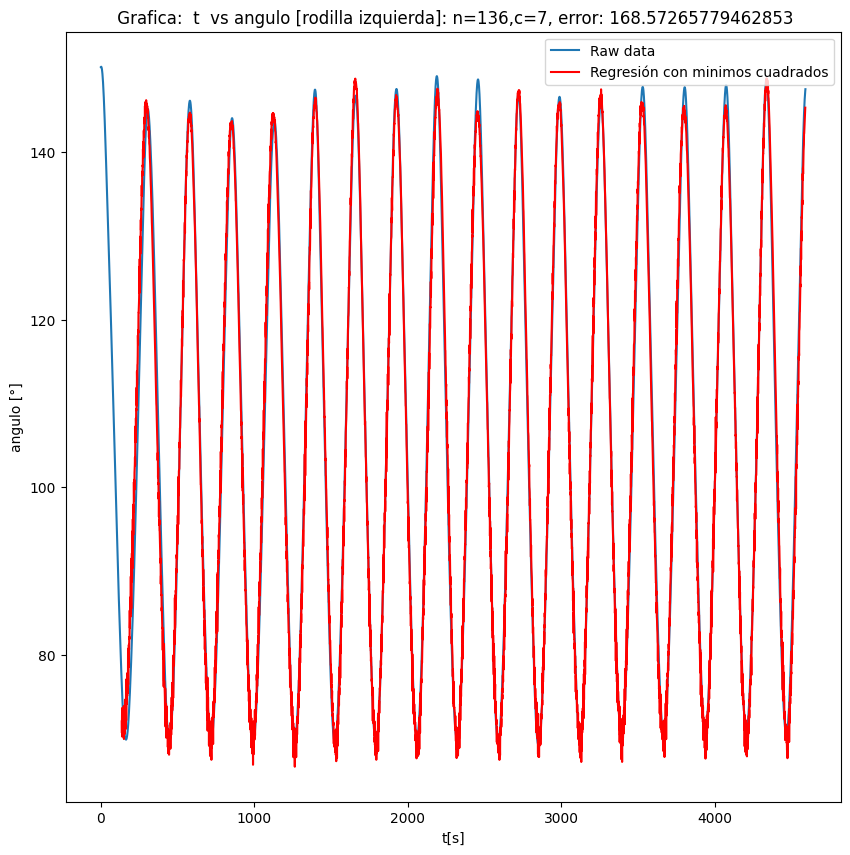

In [ ]:
h=matriz_h(clean_rod_der,136,450)
coeficientes=beta_c(h,7, rod_izq)
y = np.dot(h,coeficientes)
figure_3= plt.figure(figsize=(10, 10))
new_y = rod_izq[136+450+1:]
eror_tot=calc_error(y,new_y)

ax_1 = figure_3.add_subplot(1,1,1)
t_or=np.linspace(0, len(clean_rod_izq), len(clean_rod_izq))

ax_1.plot(t_or,clean_rod_izq, label='Raw data')
ax_1.set_title(" Grafica:  t  vs angulo [rodilla izquierda]: n="+str(136)+",c="+str(7)+", error: "+str(eror_tot))
ax_1.set_ylabel('angulo [°]')
ax_1.set_xlabel('t[s]')

elementos_vacios = np.full(136, np.nan)
y = np.concatenate((elementos_vacios, y))
t=np.linspace(0, len(y), len(y))

ax_1.plot(t,y, label='Regresión con minimos cuadrados', color="r")
ax_1.legend(loc = 'upper right')

plt.show()

#### 2.4.2 Con datos de validación

In [ ]:
data_va = pd.read_csv("valid.csv", sep=";")
print(data_va.head())
print(len(data_va))

       der      izq
0  74,9334  147,618
1  74,9052  147,727
2  74,8876    147,8
3  74,8802  147,838
4  74,8828  147,838
1080


In [ ]:
rod_der_va = data_va['der'].apply(convertir_a_float)
rod_izq_va = data_va["izq"].apply(convertir_a_float)

#### 2.4.1: Analisis de los datos para datos de validación
- se puede ver que no hay datos extraños al principio, a comparación de lo que pasaba en los datos de entrenamiento, por lo que no se ve necesario

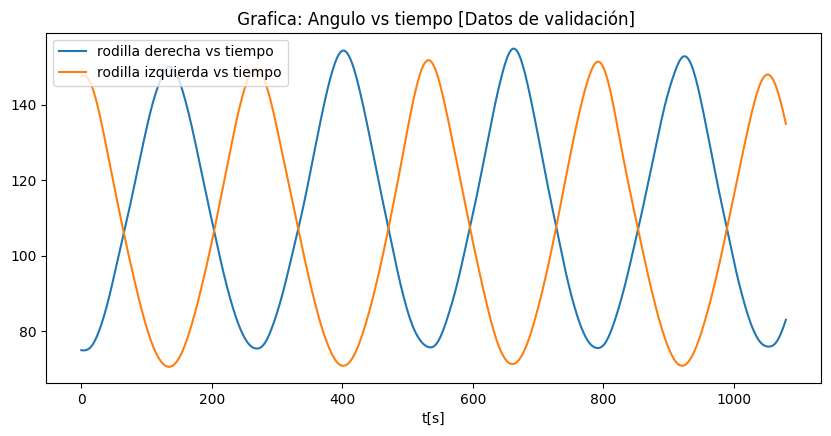

In [ ]:




figure_5 = plt.figure(figsize=(10, 10))

ax_2 = figure_5.add_subplot(2,1,1)
t=np.linspace(0, len(rod_der_va), len(rod_der_va))
ax_2.plot(t,rod_der_va, label="rodilla derecha vs tiempo")
ax_2.set_title(" Grafica: Angulo vs tiempo [Datos de validación]")
ax_2.set_xlabel('t[s]')


ax_2.plot(t,rod_izq_va, label="rodilla izquierda vs tiempo")


ax_2.legend(loc = 'upper left')

In [ ]:
def rod_izq_values(n,c):
  h=matriz_h(clean_rod_der,n,450)
  coeficientes=beta_c(h,c, rod_izq)



def calc_betas_vald (inic=20, fin=60, cin=-10, cfin=10):


    minimo =99999999999
    n =80
    c=-10
    min_rmse= 0

    minimo_rmse =99999999999
    n_rmse =80
    c_rmse=-10
    min_rmse_error= 0

    for i in range(inic,fin):
      for j in range(cin,cfin):
          h=matriz_h(clean_rod_der,i,450)
          coeficientes=beta_c(h,j, rod_izq)
          h_vals=matriz_h(rod_der_va,i,0)
          y = np.dot(h_vals,coeficientes)
          y_real = rod_izq_va[i+1:]
          eror_calc=calc_error(y,y_real)
          error_rmse = calcular_rmse(y,y_real)

          error_rmse = calcular_rmse(y,y_real)
          if (eror_calc<minimo):
            minimo= eror_calc
            n = i
            c = j
            min_rmse= error_rmse

          if(error_rmse<minimo_rmse):
            minimo_rmse= error_rmse
            n_rmse = i
            c_rmse = j
            min_rmse_error= eror_calc
          print("n = "+str(i)+"c = "+str(j)+" Norma L2:" +str(eror_calc)+" rmse: "+str(error_rmse))

    return [[minimo,n, c, min_rmse], [minimo_rmse, n_rmse, c_rmse,min_rmse_error]]

In [ ]:
minimo_calc_val = calc_betas_vald(inic = 120,fin =200)

print("El minimo de todos es: ")
print(minimo_calc_val)
#[[86.54875636398043, 128, -1, 2.8065357153447037], [2.8047596895080558, 126, 9, 86.58488956418739]]


In [ ]:
minimo_calc_val = calc_betas_vald(inic = 136,fin =137, cin=7, cfin=8)

print("El minimo de todos es: ")
print(minimo_calc_val)
#[[86.57219624383484, 136, 7, 2.8191785922077575]]

137
4453
n = 136c = 7 Norma L2:97.082888255798 rmse: 3.1614538167608806
El minimo de todos es: 
[[97.082888255798, 136, 7, 3.1614538167608806], [3.1614538167608806, 136, 7, 97.082888255798]]


In [ ]:
minimo_calc_val = calc_betas_vald(inic = 147,fin =148, cin=-17, cfin=-16)

print("El minimo de todos es: ")
print(minimo_calc_val)
#[87.43244834586699, 147, -17, 2.8639450685999255]

148
4442
n = 147c = -17 Norma L2:123.53128433311693 rmse: 4.046401756749721
El minimo de todos es: 
[[123.53128433311693, 147, -17, 4.046401756749721], [4.046401756749721, 147, -17, 123.53128433311693]]


In [ ]:
minimo_calc_val = calc_betas_vald(inic = 128,fin =129, cin=-1, cfin=0)

print("El minimo de todos es: ")
print(minimo_calc_val)
#[86.54875636398043, 128, -1, 2.8065357153447037]

129
4461
n = 128c = -1 Norma L2:99.2178507384085 rmse: 3.2173592480754722
El minimo de todos es: 
[[99.2178507384085, 128, -1, 3.2173592480754722], [3.2173592480754722, 128, -1, 99.2178507384085]]


In [ ]:
minimo_calc_val = calc_betas_vald(inic = 126,fin =127, cin=9, cfin=10)

print("El minimo de todos es: ")
print(minimo_calc_val)
#[86.58488956418739, 126, 9, 2.8047596895080558]

127
4463
n = 126c = 9 Norma L2:108.93990175421129 rmse: 3.5289095655965266
El minimo de todos es: 
[[108.93990175421129, 126, 9, 3.5289095655965266], [3.5289095655965266, 126, 9, 108.93990175421129]]


##3. Superposición con una aproximación polinomica

La superposición polinomica se van a usar los datos de validación de manera que se pueda completar los datos faltantes.



- **Función objetivo**: Se puede escribir como se ve en la formula 1 (1). Que en pocas palabras es el proceso de minimos cuadrados con una estimación polinomica, lo que implica es que se busca la norma minima entre el y calculado y el y real.

- Hay que tener en cuenta que en este caso x está dado por las unidades s (segundos), $R$ sería los datos de la rodilla derecha, $I$ sería los datos en la rodilla izquierda.

- $C$ es un hiperparametro que toca verificar a punta de prueba y error, con $n$ pasa lo mismo, pues este parametro nos define los betas a definir.

\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| I(x)-\left ( β_{0}1 +...+ \beta_nR(x)^n \right)\right| \right|_2^2 . (3)
 \end{align*}


 - Hay que tener en cuenta que esta función objetivo nos funciona para todo dato que este $0<x<n-1$

- **Variables de desición**: En este caso las variables de desición son todos los $β_n$. Lo que quiere decir que para esta primera parte hay un total de $n+1$ betas.


- **Restricciones**: En cuanto a restricciones se puede decir que no hay.




#### 3.1 Planteamiento por minimos cuadrados


Para este laboratorio se asume que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:
\begin{align*}
  y^* = g(x; \beta)=β_{0} +...+ \beta_n R(x)^n.(4),\\
 \end{align*}


 - **matriz_h_2**: Permite generar la matriz h teniendo en cuenta la formula (4).

  \begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty .(5)
 \end{align*}


 - **beta_2**: Permite calcular los betas, por medio de la formula, esta vez se está trabajando sin regularización (5).


  - **rod_izq_values_pol**: reune las dos funciones y nos permite calcular los y (5).


In [ ]:
def matriz_h_2(arr=rod_der_va,n=1, dev=0):
    s=(len(arr),n+1)
    matriz_result=np.ones(s)
    for i in range(0,len(arr)):
        for j in range(0,n+1):
              matriz_result[i][j]=arr[i+dev]**j
    return matriz_result


def beta_2(h, y):
    ht_h=np.dot(h.transpose(),h)
    ht_transpose = np.linalg.inv(ht_h)
    htransp_ht = np.dot(ht_transpose,h.transpose())
    beta_c = np.dot(htransp_ht,y)
    return beta_c

def rod_izq_values_pol(n):
  h=matriz_h_2(rod_der_va,n)
  coeficientes=beta_2(h, rod_izq_va)

  return np.dot(h,coeficientes)



In [ ]:
print(len(rod_izq_va))
print(len(rod_der_va))

def calc_betas_pol (inic=0, fin=20):
    minimo =99999999999
    n =80


    for i in range(inic,fin):
        rod_izquierda=rod_izq_values_pol(i)
        eror_calc=calc_error(rod_izquierda,rod_izq_va)
        if (eror_calc<minimo):
          minimo= eror_calc
          n = i
        print("n = "+str(i)+" Error:" +str(eror_calc))
    return [minimo,n]

1080
1080


#### 3.2 prueba con multiples n y verificación del error


- Para hacer la regresión polinomica se ha optado por probar con varios n para saber cual es el mejor.

- En base a las pruebas realizadas se ha llegado a notar que el mejor n es 6 con un error de 42.26

In [ ]:
calc_betas_pol(0,20)
# error  n
#[42.2687507452349, 6]

n = 0 Error:898.2987558481861
n = 1 Error:133.70614407857406
n = 2 Error:47.02804400086219
n = 3 Error:44.49495662987634
n = 4 Error:42.42899128356895
n = 5 Error:42.42892110030671
n = 6 Error:42.2687507452349
n = 7 Error:47.63841380164403
n = 8 Error:396.2201557870153
n = 9 Error:5507.925124246243
n = 10 Error:1685.5855956981425
n = 11 Error:1587.720210293819
n = 12 Error:1117.1526992186657
n = 13 Error:2682.712480934215
n = 14 Error:64189.886000253755
n = 15 Error:2044.1622419524087
n = 16 Error:11877.334061851605
n = 17 Error:8196.783010774863
n = 18 Error:7588.655061517728
n = 19 Error:9289.195424852262


[42.2687507452349, 6]

In [ ]:
calc_betas_pol(20,80)
#[2235.80260891584, 20]

n = 20 Error:2235.80260891584
n = 21 Error:23312.467881593133
n = 22 Error:16816.26088114324
n = 23 Error:28572.747622555085
n = 24 Error:74325.96326666039
n = 25 Error:5520.403185054464
n = 26 Error:15353.767253090953
n = 27 Error:9328.795488673284
n = 28 Error:76001.80283018663
n = 29 Error:22312.458892027407
n = 30 Error:220116.2861703128
n = 31 Error:23784.130326287217
n = 32 Error:136609.0404651064
n = 33 Error:24933091.552147426
n = 34 Error:43430.19988713274
n = 35 Error:351850.18658776244
n = 36 Error:259616.23574029992
n = 37 Error:861080.0228686264
n = 38 Error:132975.46434027306
n = 39 Error:734354.1163462808
n = 40 Error:63325.254323822235
n = 41 Error:822519.0188404559
n = 42 Error:113583.76469532952
n = 43 Error:1340204.4138045937
n = 44 Error:25948903.46088647
n = 45 Error:1534780.9298258063
n = 46 Error:1358256.7898293198
n = 47 Error:2154485.849075106
n = 48 Error:2836662.829158881
n = 49 Error:2175352.981669892
n = 50 Error:1201132.5415252466
n = 51 Error:2114856.3937

[2235.80260891584, 20]

#### 3.3 Grafica estimaciones

Estimación con la regreción de minimos cuadrados y una regresión polinomica n = 6.


137
4453


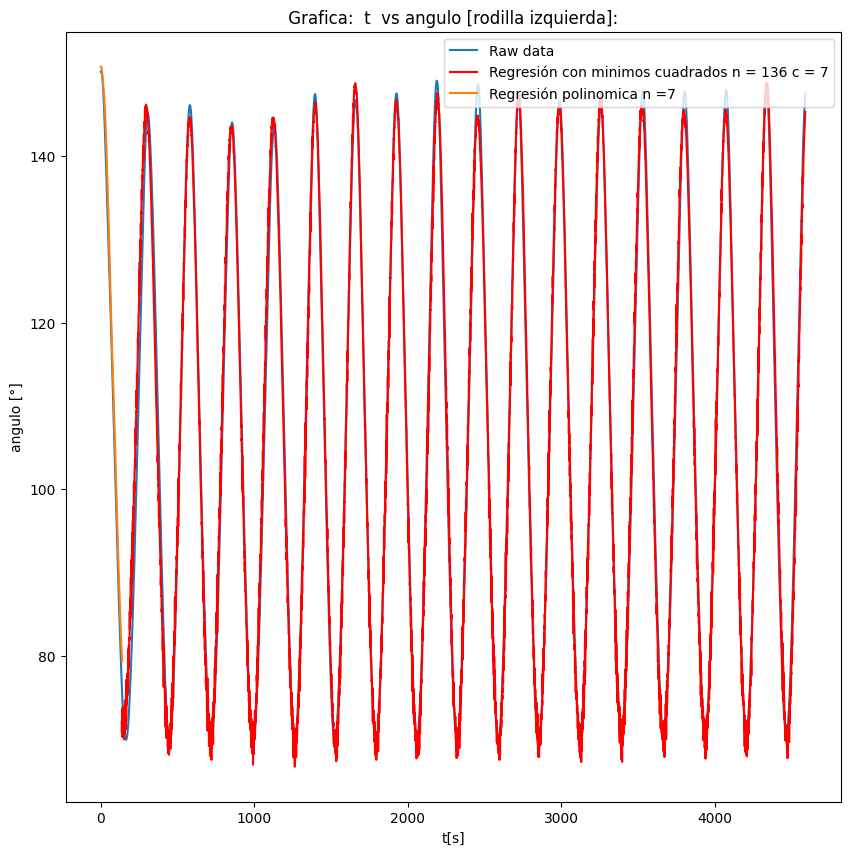

In [ ]:
h=matriz_h(clean_rod_der,136,450)
coeficientes=beta_c(h,7, rod_izq)
y = np.dot(h,coeficientes)
figure_3= plt.figure(figsize=(10, 10))
new_y = rod_izq[136+450+1:]
eror_tot=calc_error(y,new_y)

ax_1 = figure_3.add_subplot(1,1,1)
t_or=np.linspace(0, len(clean_rod_izq), len(clean_rod_izq))

ax_1.plot(t_or,clean_rod_izq, label='Raw data')
ax_1.set_title(" Grafica:  t  vs angulo [rodilla izquierda]: ")
ax_1.set_ylabel('angulo [°]')
ax_1.set_xlabel('t[s]')

elementos_vacios = np.full(136, np.nan)
y = np.concatenate((elementos_vacios, y))
t=np.linspace(0, len(y), len(y))

ax_1.plot(t,y, label='Regresión con minimos cuadrados n = 136 c = 7', color="r")


h=matriz_h_2(rod_der_va,7,dev=0)
coeficientes=beta_2(h, rod_izq_va)
der = clean_rod_der[:136+2]
h_pol=matriz_h_2(der,7, dev=450)
rod_izquierda_pol=np.dot(h_pol,coeficientes)

t_pol=np.linspace(0, len(rod_izquierda_pol), len(rod_izquierda_pol))
ax_1.plot(t_pol,rod_izquierda_pol, label='Regresión polinomica n =7')
ax_1.legend(loc = 'upper right')

plt.show()

#### 3.4 Cálculo RMSE


Para verificar que tan acertado el modelo está se ha optado por hacer la prueba con datos de validación y con datos de entrenamiento.

In [ ]:
def calcular_rmse(valores_reales, valores_predichos):
    valores_reales = np.array(valores_reales)
    valores_predichos = np.array(valores_predichos)

    diferencias_cuadradas = (valores_reales - valores_predichos) ** 2

    rmse = np.sqrt(np.mean(diferencias_cuadradas))
    return rmse

#### 3.4 Cálculo de la predicción de y

función y_inic permite predecir los primeros valores $0<x<n$ usando la regresión que toma la función  (4), y de n y el resto de los valores toma la formula  (2) para predecir el resto de los valores. Al final estos valores se concatenan para mostrar una predicción completa de todos los datos solicitados.


In [ ]:
def y_inic (d_data, n , sal, desv):
  h=matriz_h_2(rod_der_va,n,dev=0)
  coeficientes=beta_2(h, rod_izq_va)
  der = d_data[:sal+1]
  h_pol=matriz_h_2(der,n, dev=desv)
  return np.dot(h_pol,coeficientes)

def y_fin (d_data, n,c , ent=450, ent2=450):
  h=matriz_h(clean_rod_der,n=n,desp=ent)
  coeficientes=beta_c(h,c, rod_izq)
  h=matriz_h(d_data,n=n,desp=ent2)
  return np.dot(h,coeficientes)


### 3.5 Verificación de los modelos




Tenga en cuenta que Modelo se refiere a la combinación de hiperparametros. La tabla 1 muestra las mejores combinaciones de hiperparametros, para diferentes metricas y diferentes datos (validación, entrenamiento):

  Tabla 1:

| Modelo       | $n$    |$c$    |$n_2$  |
| -------------|---- |-----|---- |
| Modelo 1| 136 |7    |6    |
| Modelo 2| 147 |-17   |6    |  
| Modelo 3|  128 |-1   |6    |  
| Modelo 4| 126 |9   |6    |   


Las pruebas que se muestran a continuación son en base a la tabla anterior.



### Calculo para datos de Entrenamiento

##### 3.5.1 Cálculo de la predicción para los valores para validar y calculo de RMSE [Modelo 1]:


In [ ]:
y_inicial_train = y_inic(clean_rod_der,6,136, desv=450)
y_final_train = y_fin(clean_rod_der,136,7,450,450)
y_resultado = np.concatenate((y_inicial_train, y_final_train))
print(len(clean_rod_der))
print(len(y_resultado))

print ("RMSE  [usando de datos de entrenamiento]: ")
print(calcular_rmse(clean_rod_izq, y_resultado))

137
4453
4590
4590
RMSE  [usando de datos de entrenamiento]: 
3.013842739424446


##### 3.5.2 Cálculo de la predicción para los valores para validar y calculo de RMSE [Modelo 2]:

In [ ]:

y_inicial_train = y_inic(clean_rod_der,6,147, desv=450)
y_final_train = y_fin(clean_rod_der,147,-17,450,450)
y_resultado = np.concatenate((y_inicial_train, y_final_train))
print(len(clean_rod_der))
print(len(y_resultado))

print ("RMSE  [usando de datos de entrenamiento]: ")
print(calcular_rmse(clean_rod_izq, y_resultado))



148
4442
4590
4590
RMSE  [usando de datos de entrenamiento]: 
3.9219060269106483


##### 3.5.3 Cálculo de la predicción para los valores para validar [Modelo 3]:

In [ ]:

y_inicial_train = y_inic(clean_rod_der,6,128, desv=450)
y_final_train = y_fin(clean_rod_der,128,-1,450,450)
y_resultado = np.concatenate((y_inicial_train, y_final_train))
print(len(clean_rod_der))
print(len(y_resultado))

print ("RMSE  [usando de datos de entrenamiento]: ")
print(calcular_rmse(clean_rod_izq, y_resultado))



129
4461
4590
4590
RMSE  [usando de datos de entrenamiento]: 
3.029268614113175


##### 3.5.4 Cálculo de la predicción para los valores para validar [Modelo 4:]:

In [ ]:

y_inicial_train = y_inic(clean_rod_der,6,126, desv=450)
y_final_train = y_fin(clean_rod_der,126,9,450,450)
y_resultado = np.concatenate((y_inicial_train, y_final_train))
print(len(clean_rod_der))
print(len(y_resultado))

print ("RMSE  [usando de datos de entrenamiento]: ")
print(calcular_rmse(clean_rod_izq, y_resultado))

127
4463
4590
4590
RMSE  [usando de datos de entrenamiento]: 
3.3637722661643896


### Calculo para datos de verificación

##### 3.4.3 Cálculo de la predicción para los valores para validar y calculo de RMSE [Modelo 1]:



In [ ]:
y_inicial_val = y_inic(rod_der_va,6,136,desv=0)
y_final_val = y_fin(rod_der_va,136,7,450,0)
y_resultado_val = np.concatenate((y_inicial_val, y_final_val))
print(len(rod_izq_va))
print(len(y_resultado_val))
print ("RMSE  [usando datos de validez]: ")
print(calcular_rmse(rod_izq_va, y_resultado_val))

137
4453
1080
1080
RMSE  [usando datos de validez]: 
3.077080460169336


##### 3.4.4 Cálculo de la predicción para los valores para validar y calculo de RMSE [Modelo 2]:

In [ ]:
y_inicial_val = y_inic(rod_der_va,6,147,desv=0)
y_final_val = y_fin(rod_der_va,147,-17,450,0)
y_resultado_val = np.concatenate((y_inicial_val, y_final_val))
print(len(rod_izq_va))
print(len(y_resultado_val))
print ("RMSE  [usando datos de validez]: ")
print(calcular_rmse(rod_izq_va, y_resultado_val))

148
4442
1080
1080
RMSE  [usando datos de validez]: 
3.86003230931691


##### 3.4.5 Cálculo de la predicción para los valores para validar y calculo de RMSE [Modelo 3]:



In [ ]:
y_inicial_val = y_inic(rod_der_va,6,128,desv=0)
y_final_val = y_fin(rod_der_va,128,-1,450,0)
y_resultado_val = np.concatenate((y_inicial_val, y_final_val))
print(len(rod_izq_va))
print(len(y_resultado_val))
print ("RMSE  [usando datos de validez]: ")
print(calcular_rmse(rod_izq_va, y_resultado_val))

129
4461
1080
1080
RMSE  [usando datos de validez]: 
3.135161100034155


##### 3.4.5 Cálculo de la predicción para los valores para validar y calculo de RMSE [Modelo 4]:


In [ ]:
y_inicial_val = y_inic(rod_der_va,6,126,desv=0)
y_final_val = y_fin(rod_der_va,126,9,450,0)
y_resultado_val = np.concatenate((y_inicial_val, y_final_val))
print(len(rod_izq_va))
print(len(y_resultado_val))
print ("RMSE  [usando datos de validez]: ")
print(calcular_rmse(rod_izq_va, y_resultado_val))

127
4463
1080
1080
RMSE  [usando datos de validez]: 
3.419895037999578


## 3.5  Tabla de error:



En la tabla 2 presenta los resultados para los hiperparametros que tuvieron mejores resultados, evaluados con diferentes tipos de datos. Entre las metricas tenemos la norma L2 que solo es evluada para los $R(n)<= R(x)<R(m)$ donde m es el último dato y $n$ es el hiperparametro de la regresión por minimos cuadrados.

Tabla 2:

| Modelo        | Datos   |n    |c    |n_2  | Norma L2 [ (n+1<R(x)<R(m)]| RMSE [0<R(x)<R(m)]|
| -------------| -------------|---- |-----|---- |-----------| ------------ |
| Modelo 1| Entrenamiento| 136 |7    |6    |**168.57**   | 2.53
| Modelo 1| Validación   | 136 |7    |6    |86.57     | 2.77
| Modelo 2| Entrenamiento   | 147 |-17   |6    |  **172.85**   |2.60
| Modelo 2| validación   | 147 |-17   |6    |  87.43    |2.80
| Modelo 3| Entrenamiento   | 128 |-1   |6    | 171.65   |2.57
| Modelo 3| validación   | 128 |-1   |6    |86. 54  |2.767
| Modelo 4| Entrenamiento   | 126 |9   |6    |  171.65  |2.57
| Modelo 4| validación   | 126 |9   |6    | 86.58  |2.76

In [ ]:
def try_all (n_inic = 120, n_fin =150, c_inic=-20, c_fin = 20, n=8):
    n_min = 0
    rmse_fin = 999999
    c_min = 0
    n_fin = 0
    for i in range(120, 130):
      for j in range(-10, 10 ):
        for k in range(3,8):

            y_inicial_train = y_inic(clean_rod_der,k,i, desv=450)
            y_final_train = y_fin(clean_rod_der,i,j,450,450)
            y_resultado = np.concatenate((y_inicial_train, y_final_train))
            print(len(clean_rod_der))
            print(len(y_resultado))

            print ("RMSE  [usando de datos de entrenamiento]: ")
            rmse_calc = calcular_rmse(clean_rod_izq, y_resultado)
            print(rmse_calc)
            if (rmse_calc<rmse_fin):
              rmse_fin= rmse_calc
              n_min = i
              c_min = j
              n_fin = k
    print("Minimo encontrado:")
    print("n: "+str(n_min)+", c: "+str(c_min)+ " n_2: "+str(n_fin)+" Calculo rmse: "+str(rmse_fin))


In [ ]:
try_all(n_inic = 120, n_fin =130, c_inic=-10, c_fin = 10, n=8)

In [ ]:
try_all(n_inic = 130, n_fin =140, c_inic=-10, c_fin = 10, n=8)
#n: 136, c: 7 n_2: 7 Calculo rmse: 2.5221603176536074

In [ ]:
try_all(n_inic = 130, n_fin =140, c_inic=-10, c_fin = 10, n=8)
#n: 145, c: 1 n_2: 7 Calculo rmse: 2.6306024910118566

### 3.6 Hiperparametros seleccionados

Después de relizar varias pruebas se ha optado por usar la siguiente combinación de hiperparametros :

| Modelo | $n$ |$c$  |$n_2$|RMSE|
| -------|---- |-----|---- |-----|
| Modelo 1| 136 |7   |7    |2.52|


## 4. Calculo para los valores a predecir:

Ahora en el siguiente código se va a presentar el mismo proceso de predicción, pero para los valores incognitos.

In [ ]:
data_vi = pd.read_csv("valores_incognito.csv", sep=";")
print(data_vi.head())
print(len(data_vi))

       der
0  83,5353
1  84,0916
2  84,6594
3   85,238
4   85,827
1080


## 4.1 Analisis de los datos.


Con la gráfica se puede ver que no hay datos iniciales que puedan afectar al predicción por lo que no hay necesidad de hacer una limpieza.

Text(0.5, 0, 'tiempo [s]')

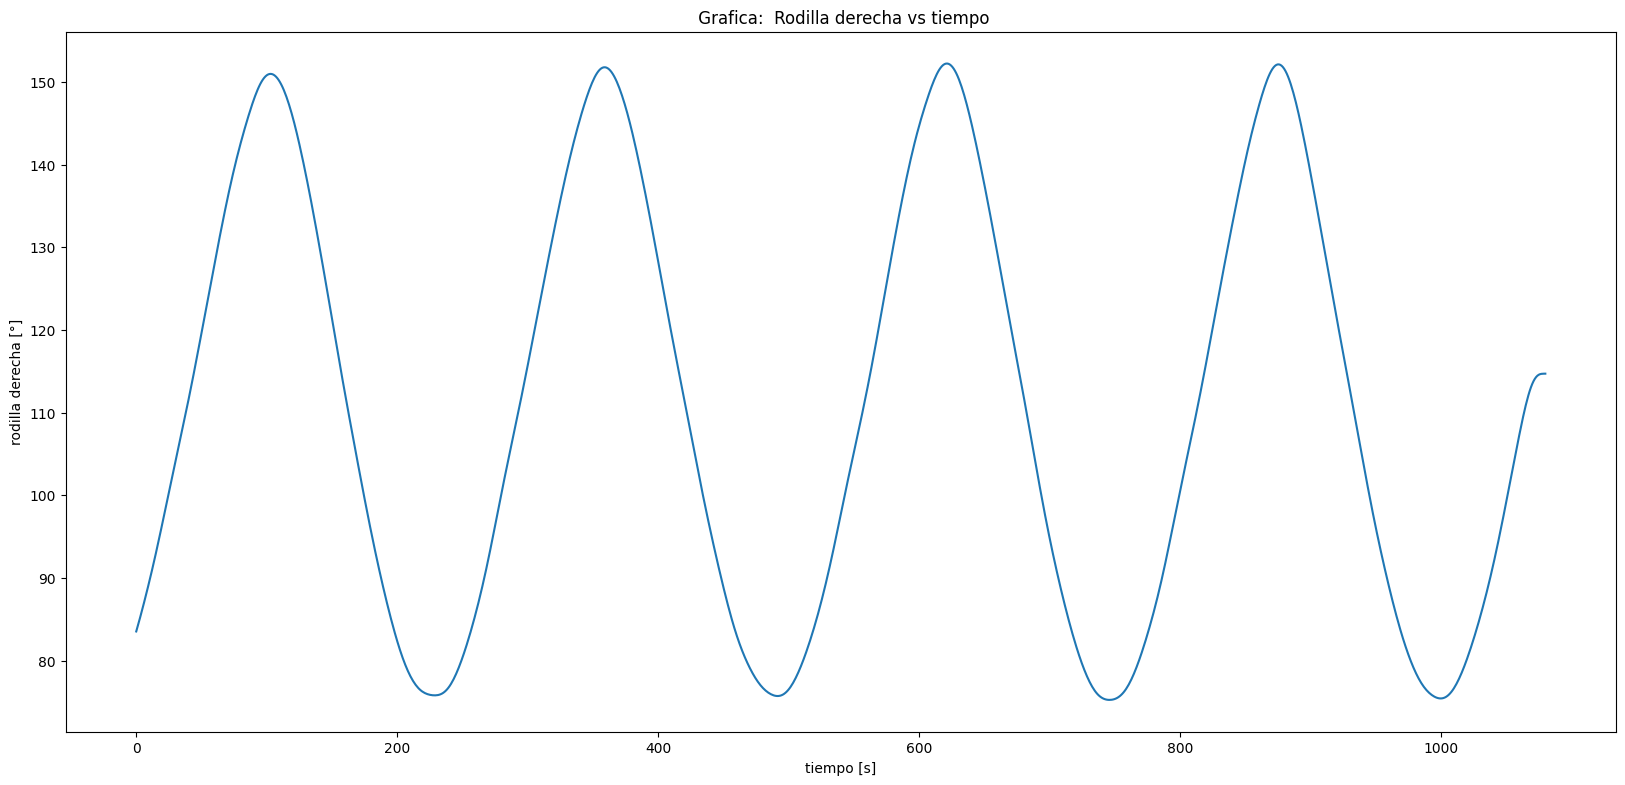

In [ ]:

rod_der_in = data_vi['der'].apply(convertir_a_float)


figure_1 = plt.figure(figsize=(20, 20))

ax_2 = figure_1.add_subplot(2,1,1)
t=np.linspace(0, len(rod_der_in), len(rod_der_in))
ax_2.plot(t,rod_der_in)
ax_2.set_title(" Grafica:  Rodilla derecha vs tiempo")
ax_2.set_ylabel('rodilla derecha [°]')
ax_2.set_xlabel('tiempo [s]')


## 4.2 Predicción de los valores para rodilla izquierda

In [ ]:


y_inicial_in = y_inic(rod_der_in,7,136, desv=0)

y_final_in = y_fin(rod_der_in,136,7,450,0)
y_resultado_in = np.concatenate((y_inicial_in, y_final_in))



137
4453


## 4.3 Analisis de predicción en una grafica.

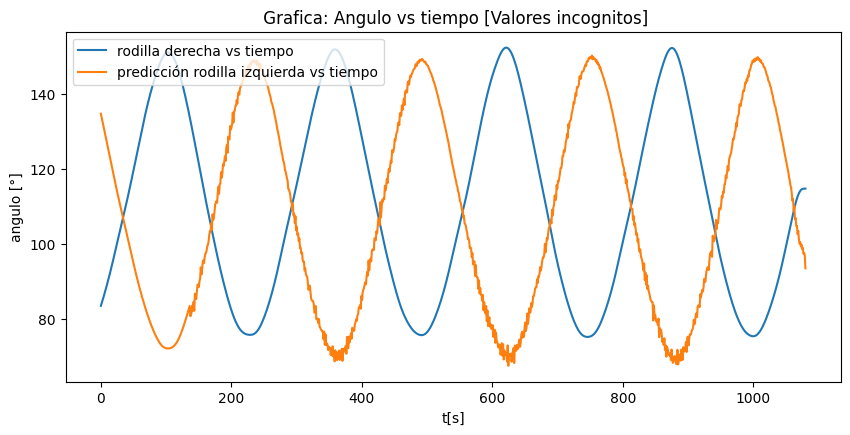

In [ ]:

figure_6 = plt.figure(figsize=(10, 10))

ax_2 = figure_6.add_subplot(2,1,1)
t=np.linspace(0, len(y_resultado_in), len(y_resultado_in))
ax_2.plot(t,rod_der_in, label="rodilla derecha vs tiempo")
ax_2.set_title(" Grafica: Angulo vs tiempo [Valores incognitos]")
ax_2.set_xlabel('t[s]')
ax_2.set_ylabel('angulo [°]')


ax_2.plot(t,y_resultado_in, label="predicción rodilla izquierda vs tiempo")


ax_2.legend(loc = 'upper left')

### 4.3 Predicción.csv

Creación de csv de predicción para rodilla izquierda.

In [ ]:
import os
import shutil




def guardar_csv(datos=y_resultado_in, nombre_archivo="predictions.csv", datos_org=rod_der_in):


    data = datos.tolist()
    datos_org = rod_der_in.tolist()
    datas = [["data", "izq"]]

    for i in range(len(data)):
        datas.append([datos_org[i], data[i]])

    np.savetxt(nombre_archivo, datas, delimiter=',', fmt='%s')

guardar_csv()

In [ ]:
data_vi = pd.read_csv("predictions.csv", sep=";")
print(data_vi.head())
print(len(data_vi))

                     data,izq
0  83.5353,134.62767236691434
1  84.0916,133.78792250237893
2  84.6594,132.94466722611105
3   85.238,132.09965044248383
4    85.827,131.2540503460914
1080


## 5. Analisis de la solución

El problema consiste en crear un modelo de regresión lineal que prediga el ángulo de la rodilla izquierda a partir del ángulo de la rodilla derecha en un estudio cinemático de ciclismo. Esto puede ser útil para evaluar la simetría y la eficiencia del

 movimiento del ciclista.
Se utilizan dos métodos de medición del movimiento: el método tridimensional, que usa cámaras de infrarrojo y permite una reconstrucción precisa pero es costoso, y el método bidimensional, que usa marcadores y grabación de video y es más económico pero limitado. Se comparan los resultados de ambos métodos para validar el modelo de regresión.
Para los  $R(n)<R(x)<R(m)$ valores. Siendo m el ultimo instante de tiempo de tiempo. $n$ siendo el hiperparametro para el número de betas. Se usa la siguiente formula para la regresión en esos instantes de tiempo:

\begin{equation}
L(k) = \sum_{i=0}^n \beta_i R(k-i) = \beta_0 R(k) + \beta_1 R(k-1) + \cdots + \beta_n R(k-n)
\end{equation}


Para los  $R(0)<R(x)<R(n)$ siguientes valores se usa la siguiente equación para hacer la regresión:


\begin{align*}
  y^* =\sum_{i=0}^n β_{0} +...+ \beta_n R(x)^n.,\\
 \end{align*}

En esta se usa la historia del ángulo de la rodilla derecha para predecir el valor actual del ángulo de la rodilla izquierda. Los parámetros del modelo se obtienen mediante regresión regularizada, que penaliza los valores grandes de los coeficientes para evitar el sobreajuste.

El modelo depende de dos hiperparámetros, el tamaño de la ventana n y el coeficiente de regularización c. Se recomienda probar varias combinaciones de estos valores y seleccionar el modelo que tenga el menor error cuadrático medio (RMSE) sobre el conjunto de validación.


En ste caso fue La siguiente combinación de hiperparametros fue seleccinado:

| Modelo | $n$ |$c$  |$n_2$|RMSE|
| -------|---- |-----|---- |-----|
| Modelo 1| 136 |7   |7    |2.52|
